import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as skim
from skimage import io
from skimage.util import crop
import matplotlib.image as mpimg

definition function

In [2]:
def thresholding(thresh,img):
    nrow, ncol, ncolor  = img.shape
    new_img = img.copy()
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0]>thresh and img[i,j][1]>thresh and img[i,j][2]>thresh ):
                new_img[i,j] = [255,255,255]
    # plt.imshow(new_img)
    return new_img

In [3]:
def thresholding_2value(min_th,max_th,img):
    nrow, ncol, ncolor  = img.shape
    new_img = img.copy()
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0]>max_th and img[i,j][1]>max_th and img[i,j][2]>max_th ):
                new_img[i,j] = [255,255,255]
            if(img[i,j][0]<min_th and img[i,j][1]<min_th and img[i,j][2]<min_th ):
                new_img[i,j] = [255,255,255]
    # plt.imshow(new_img)
    return new_img

In [4]:
def find_length(img,position = True): #input must thresholding before
    nrow, ncol, ncolor  = img.shape
    right_position = []
    left_position = []
    #find all left side
    temp1 = []
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0] < 255 ):
                temp1.append((i,j))
                break
    #find true left side
    temp2 = []
    for i in range(len(temp1)):
        temp2.append(temp1[i][1])
    min_col = np.min(temp2)
    #find center true left side
    temp3 = []
    for i in range(nrow):
        if(img[i,min_col][0] < 255 ):
            temp3.append(i)
    if(len(temp3) == 1):
        min_row = temp3[0]
    elif(len(temp3)%2 == 0):
        min_row = temp3[int(len(temp3)/2)]
    else:
        min_row = temp3[int(len(temp3)/2) + 1]
    left_position = [min_row,min_col]
    # print(left_position)

    #find all right side
    temp1 = []
    for i in range(nrow):
        for j in range(ncol):
            i_inverse = (nrow-1) - i
            j_inverse = (ncol-1) - j
            if(img[i_inverse,j_inverse][0] < 255 ):
                temp1.append((i_inverse,j_inverse))
                break
    #find true right side
    temp2 = []
    for i in range(len(temp1)):
        temp2.append(temp1[i][1])
    max_col = np.max(temp2)
    #find center true right side
    temp3 = []
    for i in range(nrow):
        if(img[i,max_col][0] < 255 ):
            temp3.append(i)
    if(len(temp3) == 1):
        min_row = temp3[0]
    elif(len(temp3)%2 == 0):
        min_row = temp3[int(len(temp3)/2)]
    else:
        min_row = temp3[int(len(temp3)/2) + 1]
    right_position = [min_row,max_col]
    if(position == True):
        print(left_position)
        print(right_position)

    #find length with pythagoras theorem
    base = np.abs(right_position[1] - left_position[1])
    perp = np.abs(left_position[0] - right_position[0])
    length = np.hypot(base, perp)
    # print("length of picture is " , length , str("pixel"))
    return length
    

In [5]:
def plot_compare_img(img1,img2):
    plt.figure(figsize=(20,10))
    plt.subplot(121), plt.imshow(img1), plt.axis('off') 
    plt.subplot(122), plt.imshow(img2), plt.axis('off') 
    plt.show()  

In [6]:
def plot_histogram(img):
    _ = plt.hist(img.ravel(), bins = 256, color = 'orange', )
    _ = plt.hist(img[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
    _ = plt.hist(img[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
    _ = plt.hist(img[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
    _ = plt.xlabel('Intensity Value')
    _ = plt.ylabel('Count')
    _ = plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
    plt.show()

In [7]:
def pixel_to_cm(pixel):
    return (pixel*0.5)/59

make measure image

In [8]:
def_img = io.imread("image\\11.26.2020 Heptane-0.06mM Triton x-100\\frame 2\\2-20-52 PM\\11.26.2020 (2) 1255.jpg", as_gray=False)
def_img.shape

(1080, 1920, 3)

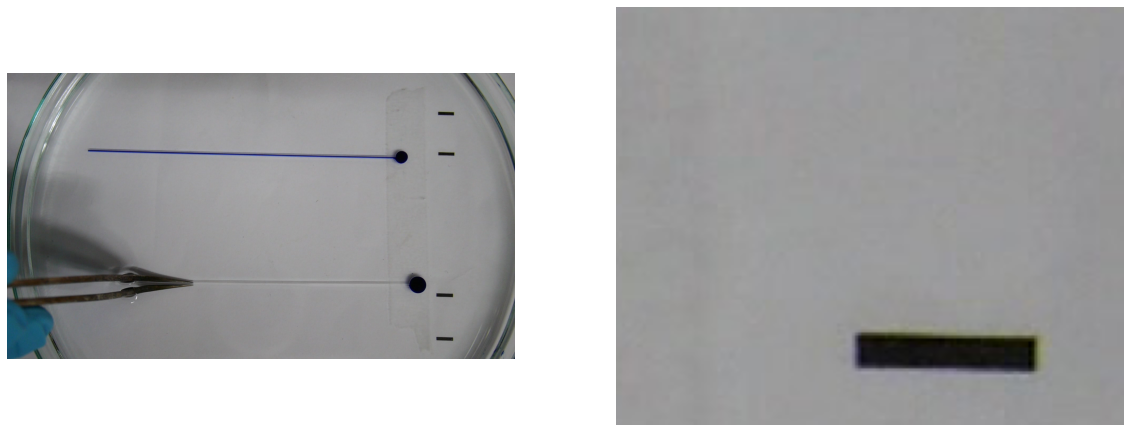

In [9]:
measure_im = crop(def_img, ((190, 750), (1550, 200), (0,0)), copy=False)
# print(def_img.shape, measure_im.shape)
plot_compare_img(def_img,measure_im)

In [10]:
# plot_histogram(measure_im)

[115, 81]
[113, 140]


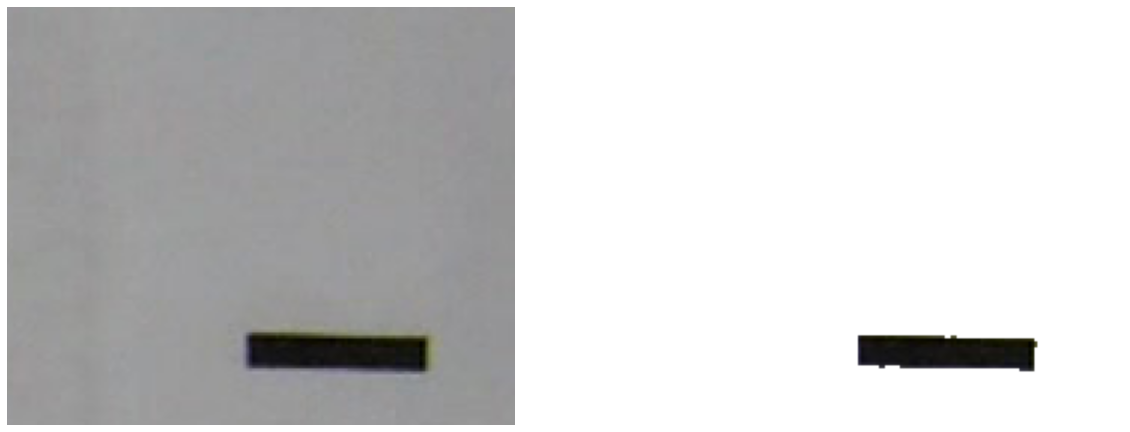

length of picture is  59.033888572581766 pixel


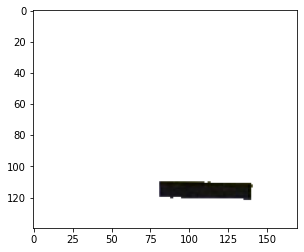

In [11]:
thresh_measure_im = thresholding(50,measure_im)
l = find_length(thresh_measure_im)
plot_compare_img(measure_im,thresh_measure_im)
plt.imshow(thresh_measure_im)
print("length of picture is " , l , str("pixel"))

59 pixel = 0.5 cm

x pixel = y cm


y cm = (x pixel* 0.5) / 59


find definition length first picture

(1080, 1920, 3) (210, 890, 3)


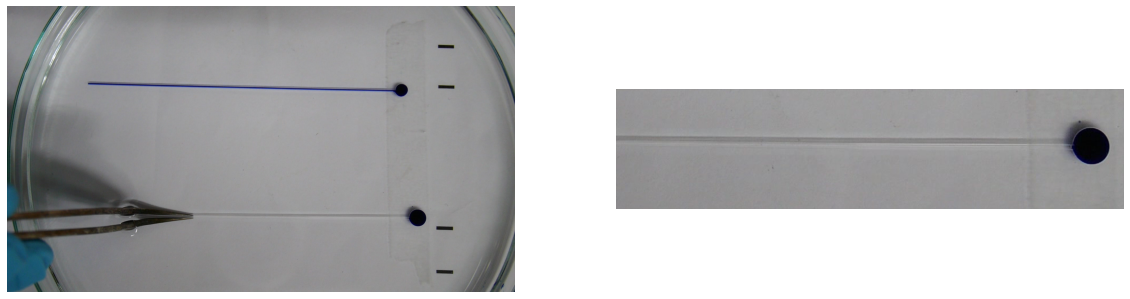

In [21]:
def_crop_im = crop(def_img, ((700, 170), (720, 310), (0,0)), copy=False)
print(def_img.shape, def_crop_im.shape)
plot_compare_img(def_img,def_crop_im)

In [22]:
# plot_histogram(def_crop_im)

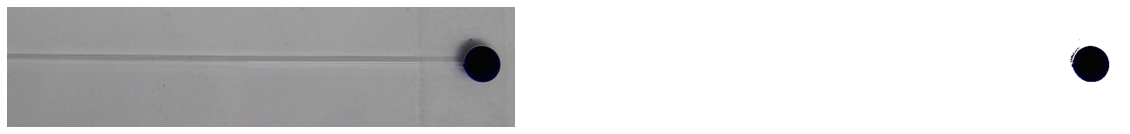

In [23]:
Tdef_img2 = thresholding(45,def_crop_im)
plot_compare_img(def_crop_im,Tdef_img2)


[92, 795]
[101, 863]
ldef  68.59300255857006 pixel


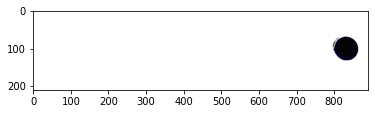

In [24]:
ldef = find_length(Tdef_img2)
plt.imshow(Tdef_img2)
print("ldef " , ldef , str("pixel"))

find length on crop value 1 from 1255 to 1342

In [25]:
number_of_picture = 1255
thresh = 45
template1 = []
l_def = 68.59300255857006
for i in range(1342-1255+1):
    if(True) :   
        image = mpimg.imread( "image\\11.26.2020 Heptane-0.06mM Triton x-100\\frame 2\\2-20-52 PM\\11.26.2020 (2) " + str(number_of_picture + i).zfill(4) + ".jpg" )
        crop_image = crop(image, ((700, 170), (720, 310), (0,0)), copy=False)
        thresh_image = thresholding(thresh,crop_image)
        # plot_compare_img(crop_image,thresh_image)
        length = find_length(thresh_image,False)
        length = length - l_def
        length = int(length)
        template1.append(length)
        # print(i, length)
        # plt.figure()
        # plt.imshow(thresh_image)
        # for i in range(len(template1)/2):
        #     if(template1[i] > 70):


In [26]:
print(template1)
print(len(template1))

[0, -1, -2, -1, 1, 4, 7, 11, 16, 22, 27, 32, 37, 42, 45, 52, 60, 67, 76, 86, 95, 102, 110, 117, 124, 131, 138, 144, 152, 157, 163, 169, 175, 181, 187, 193, 199, 205, 210, 216, 221, 227, 233, 238, 244, 248, 253, 259, 264, 269, 274, 279, 285, 290, 295, 300, 305, 310, 315, 320, 325, 329, 334, 339, 343, 348, 353, 358, 362, 367, 372, 377, 381, 385, 390, 396, 399, 405, 408, 411, 418, 422, 426, 429, 433, 439, 444, 448]
88


find length on crop value 2 from 1343 to 2976

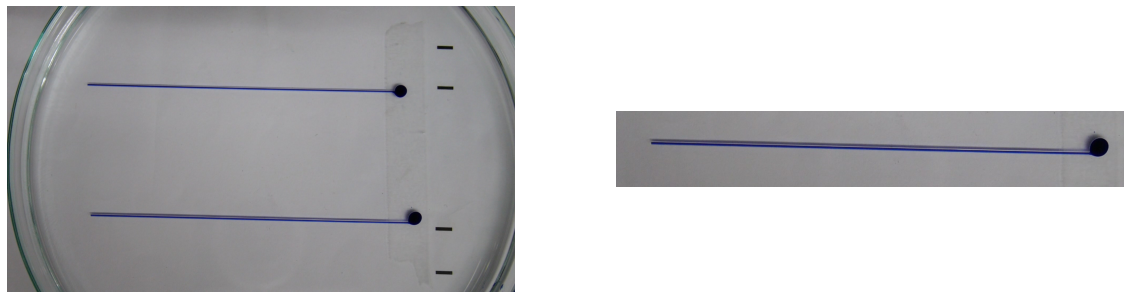

In [29]:
image = mpimg.imread( "image\\11.26.2020 Heptane-0.06mM Triton x-100\\frame 2\\2-20-52 PM\\11.26.2020 (2) " + str(2976).zfill(4) + ".jpg" )
crop_image = crop(image, ((700, 170), (220, 310), (0,0)), copy=False)
plot_compare_img(image,crop_image)

In [30]:
number_of_picture = 1343
thresh = 45
template2 = []
l_def = 68.59300255857006
for i in range(2976-1343+1):
    if( True) :
        image = mpimg.imread( "image\\11.26.2020 Heptane-0.06mM Triton x-100\\frame 2\\2-20-52 PM\\11.26.2020 (2) " + str(number_of_picture + i).zfill(4) + ".jpg" )
        crop_image = crop(image, ((700, 170), (220, 310), (0,0)), copy=False)
        if(True):
            thresh_image = thresholding(thresh,crop_image)
        else:
            thresh_image = thresholding(40,crop_image)
        # plot_compare_img(crop_image,thresh_image)
        # print(i)
        length = find_length(thresh_image,False)
        length = length - l_def
        length = int(length)
        template2.append(length)
        # print(i, length)
        # plt.figure()
        # plt.imshow(thresh_image)

In [31]:
print(template2)
print(len(template2))

[454, 458, 461, 465, 469, 473, 478, 482, 486, 490, 494, 498, 503, 508, 511, 515, 519, 523, 526, 530, 534, 538, 541, 546, 549, 553, 556, 560, 563, 567, 570, 574, 579, 583, 587, 589, 593, 596, 600, 604, 608, 612, 615, 618, 622, 627, 631, 634, 638, 641, 644, 649, 653, 656, 660, 663, 666, 670, 674, 678, 682, 685, 690, 692, 696, 699, 704, 707, 711, 714, 717, 721, 724, 728, 732, 735, 738, 742, 745, 749, 752, 756, 759, 763, 766, 769, 771, 775, 779, 782, 786, 790, 793, 796, 799, 802, 806, 809, 813, 816, 820, 822, 826, 829, 832, 836, 839, 842, 845, 848, 852, 855, 858, 861, 865, 868, 871, 874, 877, 880, 884, 887, 889, 892, 896, 899, 902, 906, 908, 911, 913, 917, 920, 924, 927, 930, 932, 935, 939, 942, 945, 949, 951, 954, 957, 960, 962, 965, 969, 972, 975, 977, 981, 984, 986, 989, 993, 995, 997, 1000, 1004, 1007, 1009, 1012, 1014, 1017, 1020, 1024, 1026, 1029, 1030, 1033, 1036, 1039, 1041, 1044, 1047, 1049, 1052, 1054, 1057, 1060, 1062, 1065, 1067, 1068, 1072, 1074, 1077, 1079, 1081, 1083, 1085, 

concat 2 template and calculate pixel to centimeter

In [32]:
l_array = np.concatenate((template1,template2), axis=0)
# print(l_array)
# print(type(l_array[1]))
# print(l_array.shape)
l_array = l_array.astype('float32')

#find missing value and set to 0
for i in range(len(l_array)):
    if(l_array[i] < 0 ):
        l_array[i] = 0

for i in range(len(l_array)):
    l_array[i] = pixel_to_cm(l_array[i])

In [33]:
print(l_array)

[ 0.        0.        0.       ... 10.008474 10.       10.      ]


export data to exel

In [34]:
import pandas as pd

In [35]:
print(len(l_array))

1722


In [36]:
data = []
num_img = 1255
for i in range(len(l_array)):
    data.append(( " 11.26.2020 (2) " + str(num_img + i).zfill(4)  ,l_array[i] )) 
# print(data)
dataframe = pd.DataFrame(data, 
             columns=['image_name', 
                      'length(cm)'])
# print(dataframe)
# writing to Excel
datatoexcel = pd.ExcelWriter('HeptaneTRITON-0.06(2)_11.26.2020_2-20-52-PM.xlsx')
# write DataFrame to excel 
dataframe.to_excel(datatoexcel)
#save the excel
datatoexcel.save()


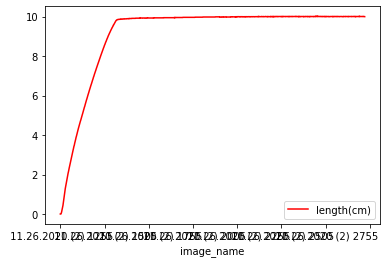

In [37]:
dataframe.plot(kind='line',x='image_name',y='length(cm)',color='red')
plt.show()